### ARIMA model forecast

In this task you should construct ARIMA model for a time series containing data about dynamics of mounthly wages in Russian Federation since 1993 year. You will train the best model (according to AIC criterion) on hystorical data and use it to make  forecast for the next 4 years.

Run the cells and fill necessary gaps.

Documentation on Statsmodels: https://www.statsmodels.org/stable/index.html

In [3]:
# let's import necassary packages...
%pylab inline
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

Populating the interactive namespace from numpy and matplotlib


C:\Users\sattar\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['product']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<Figure size 864x432 with 0 Axes>

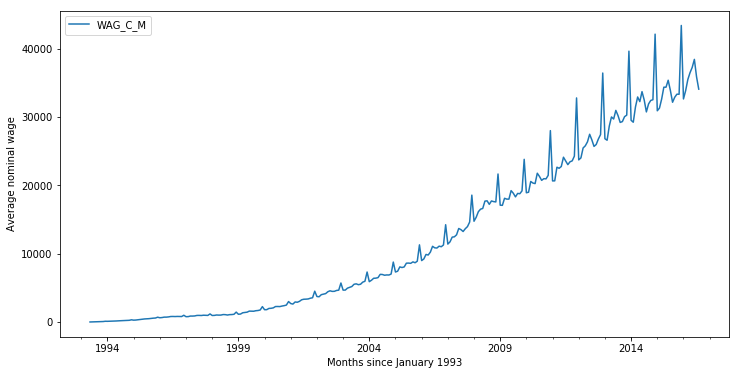

In [4]:
# let's load data...
WAG = pd.read_csv('WAG_C_M.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True,encoding='cp1251')
plt.figure(figsize(12,6))
WAG.plot()
plt.ylabel('Average nominal wage')
plt.xlabel('Months since January 1993')
pylab.show()

In [7]:
WAG.shape

(280, 1)

In [5]:
#WAG.tail(10)
#print (WAG.shape)

Dickey-Fuller test: p=0.991667


<Figure size 1080x720 with 0 Axes>

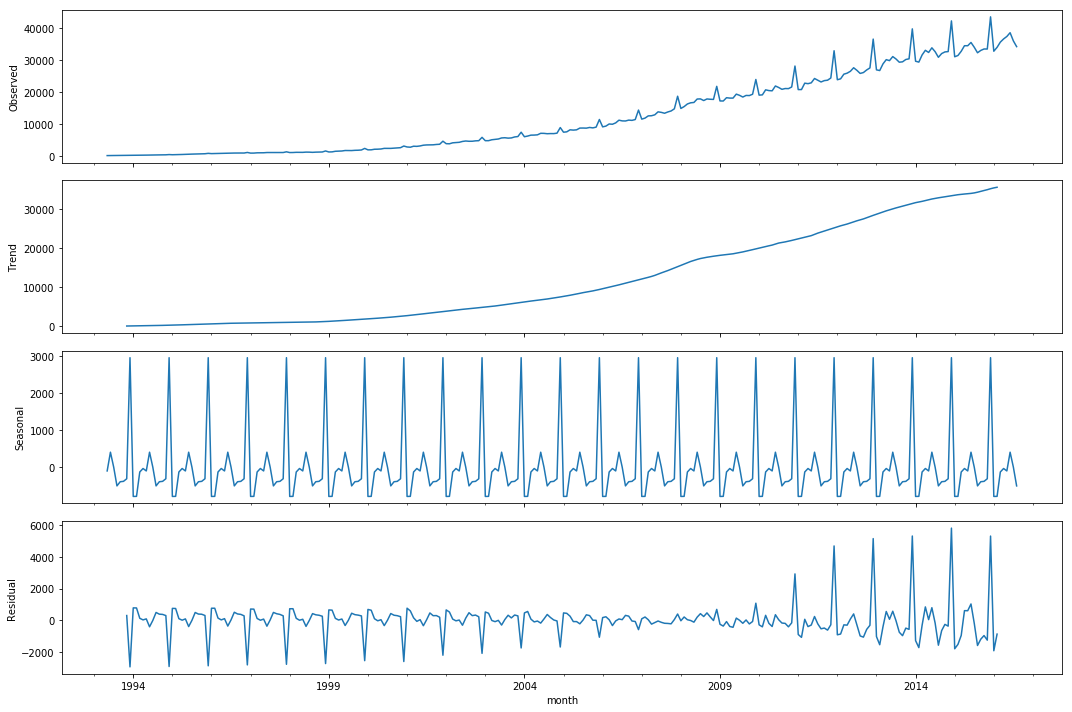

In [6]:
# evaluate components of time-series
# evaluate Dickey-Fuller test for time-series stationarity

plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(WAG.WAG_C_M).plot()
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(WAG.WAG_C_M)[1])

Best Box-Cox parameter: 0.257063
Dickey-Fuller test: p=0.688484


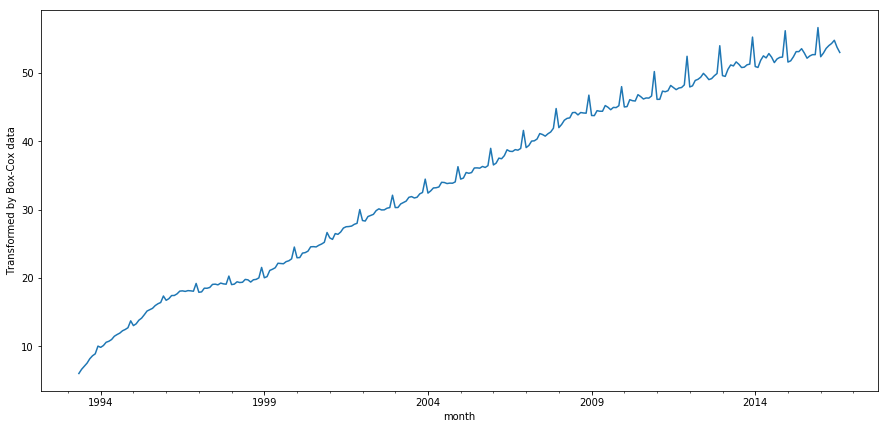

In [8]:
# Box-Cox transformation for dispersion stationarity

WAG['WAG_C_M_box'], lmbda = stats.boxcox(WAG.WAG_C_M)
plt.figure(figsize(15,7))
WAG.WAG_C_M_box.plot()
plt.ylabel('Transformed by Box-Cox data')
print("Best Box-Cox parameter: %f" % lmbda)
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(WAG.WAG_C_M_box)[1])
#sm.tsa.stattools.adfuller(WAG.WAG_C_M_box)[4]
#WAG

In [9]:
#WAG
diff=WAG.WAG_C_M_box.diff(periods=12)
#diff
WAG

,WAG_C_M,WAG_C_M_box
month,,
1993-05-01,37.5,5.986007
1993-06-01,47.4,6.599071
1993-07-01,56.0,7.058410
1993-08-01,65.4,7.503958
1993-09-01,80.9,8.144275
1993-10-01,93.0,8.583296
1993-11-01,101.5,8.866905
1993-12-01,141.2,9.996743
1994-01-01,134.2,9.816414


Dickey-Fuller test: p=0.033416


<Figure size 1080x720 with 0 Axes>

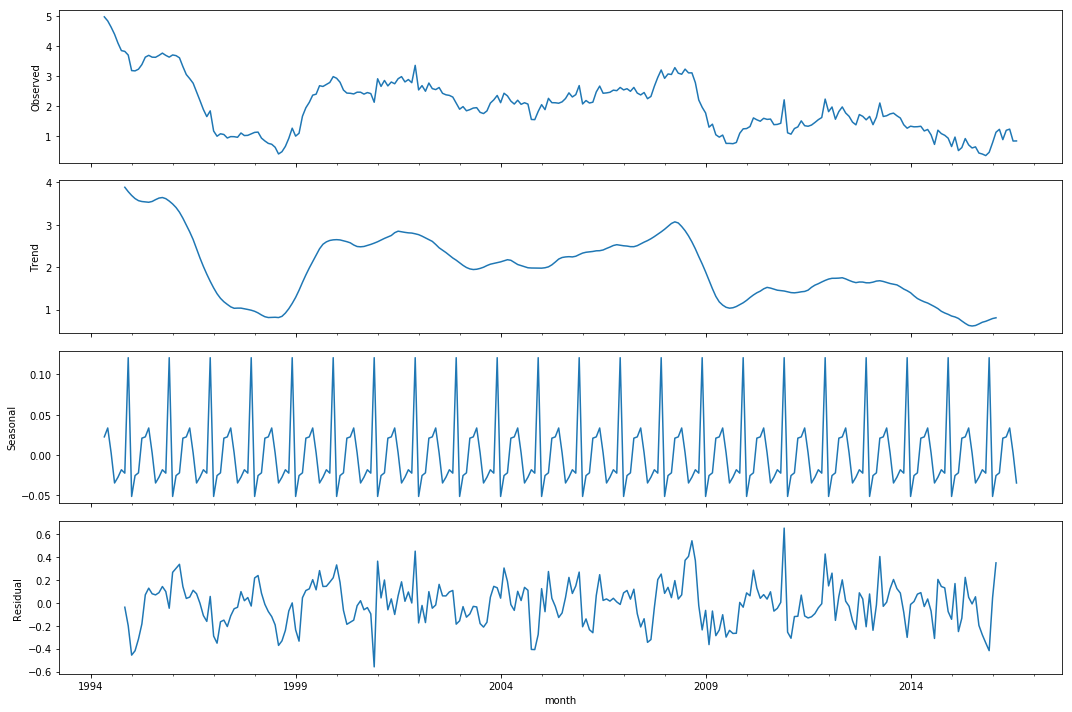

In [10]:
# seasonal difference for 12 months

WAG['WAG_C_M_box_diff'] = WAG.WAG_C_M_box - WAG.WAG_C_M_box.shift(12)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(WAG.WAG_C_M_box_diff[12:]).plot()
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(WAG.WAG_C_M_box_diff[12:])[1])

Dickey-Fuller test: p=0.000002


<Figure size 1080x720 with 0 Axes>

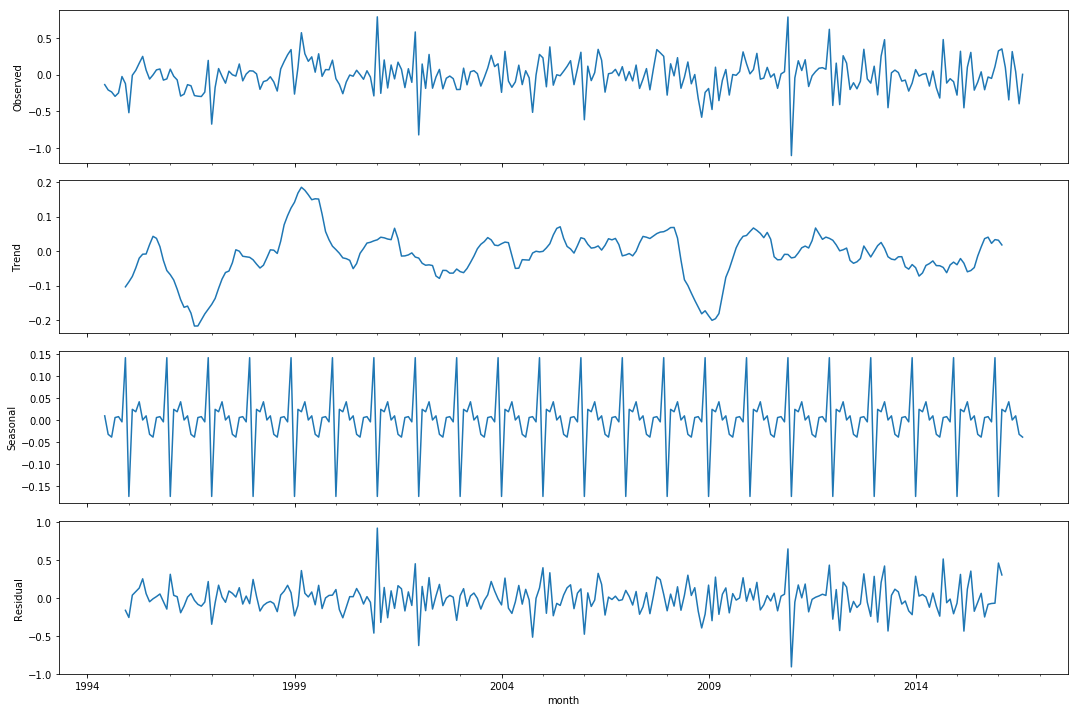

In [11]:
# CODE 1
# Make additional 1-step difference by analogy with previous cell and evaluate Dickey-Fuller p-value
# Did the data become more stationary?
WAG['WAG_C_M_box_diff2'] = WAG.WAG_C_M_box_diff - WAG.WAG_C_M_box_diff.shift(1)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(WAG.WAG_C_M_box_diff2[13:]).plot()
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(WAG.WAG_C_M_box_diff2[24:])[1])
#WAG['WAG_C_M_box_diff2'] =

In [14]:
#WAG
#WAG.WAG_C_M_box_diff2[25:].values.squeeze()
#WAG.WAG_C_M_box_diff2[25:]

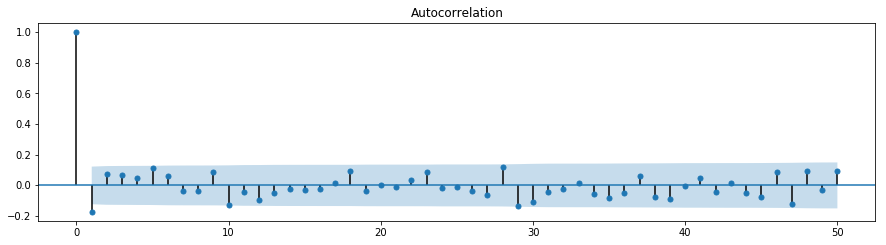

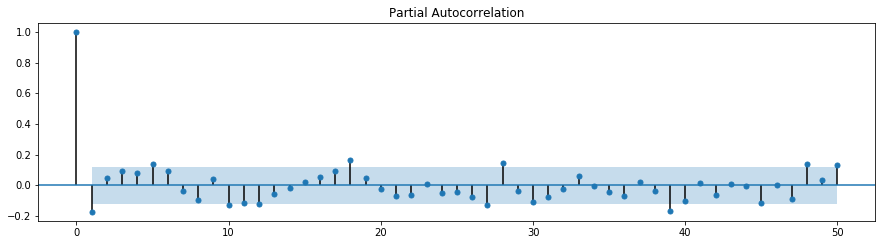

In [15]:
# let's calculate autocorrelation and partial autocorrelation components

plt.figure(figsize(15,8))

# autocorrelation 
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(WAG.WAG_C_M_box_diff2[25:].values.squeeze(), lags=50, ax=ax)
pylab.show()

# partial autocorrelation 
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(WAG.WAG_C_M_box_diff2[25:].values.squeeze(), lags=50, ax=ax)
pylab.show()

In [16]:
# CODE 2
# Choose parameters for SARIMA model based on Autocorrelation and Partial Autocorrelation graphs

ps = range(0, 2)
d  = 1
qs = range(0, 2)
Ps = range(0, 2)
D  = 1
Qs = range(0, 2)

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
print ("Number of analysed models:", len(parameters_list))
#parameters_list

Number of analysed models: 16


In [17]:
%time
# here we will choose the best model

results = []
best_aic = float("inf")

# ignore warnings 
warnings.filterwarnings('ignore')

for param in parameters_list:
    
    #try except for the case of wrong parameters
    try:
        model=sm.tsa.statespace.SARIMAX(WAG.WAG_C_M_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
        
    #print wrong parameters and go on
    # AIC criteria: 
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic

    # save best model, aic, parameters
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
        results.append([param, model.aic])
    
warnings.filterwarnings('default')

Wall time: 0 ns


In [18]:
# Top models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

     parameters        aic
7  (1, 0, 1, 0) -30.710018
6  (1, 0, 0, 1) -30.430058
5  (0, 1, 1, 0) -29.931231
4  (0, 1, 0, 1) -29.666433
3  (0, 1, 0, 0) -28.036602


print(best_model.summary())

Student test: p=0.144427
Dickey-Fuller test: p=0.0000058556381141024413067


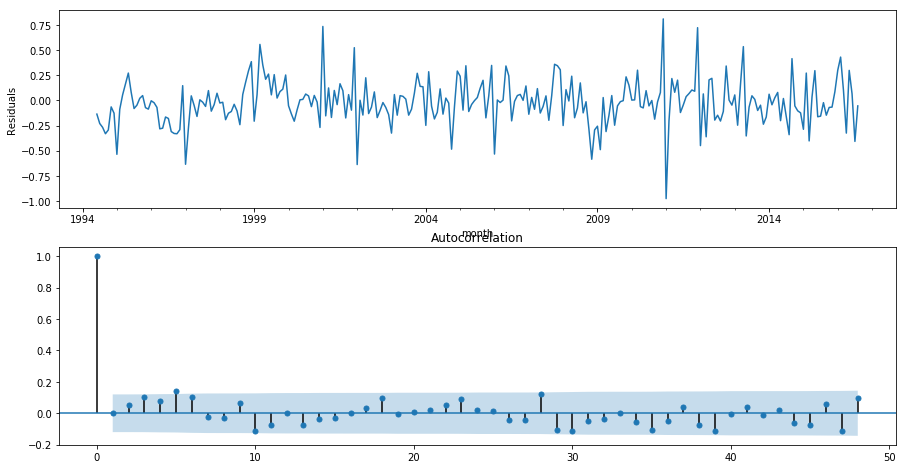

In [21]:
# evaluate Dickey-Fuller test for the best model

plt.figure(figsize(15,8))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel('Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Student test: p=%f" % stats.ttest_1samp(best_model.resid[13:], 0)[1])
print("Dickey-Fuller test: p=%.25f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

In [22]:
#inverse Box-Cox transformation:

def invboxcox(y, lmbda):
    if lmbda == 0:
        return np.exp(y)
    else:
        return np.exp(np.log(lmbda*y + 1)/lmbda)
    
WAG['model'] = invboxcox(best_model.fittedvalues, lmbda)


In [23]:
#WAG

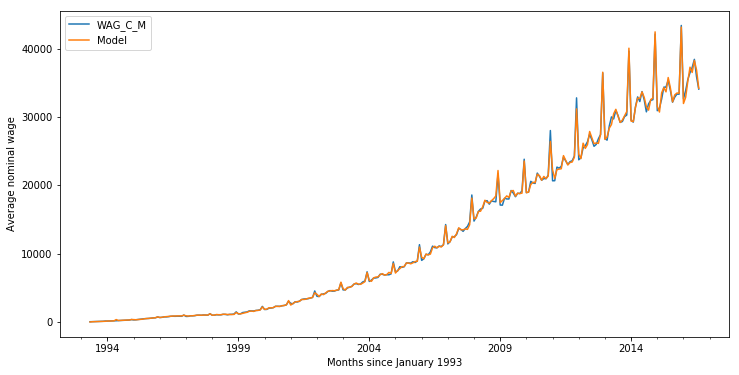

In [24]:
# CODE 3
# Plot the best model and original time series on the same figure
plt.figure(figsize(12,6))
WAG['WAG_C_M'].plot(label='WAG_C_M')
WAG['model'].plot(label='Model')
plt.ylabel('Average nominal wage')
plt.xlabel('Months since January 1993')
plt.legend()
pylab.show()

#plt.plot(-original data-)
#plt.plot(-fit by best model-)

In [31]:
WAG['WAG_C_M']
(WAG['model'][13:])


print()

In [32]:
# CODE 4
# Evaluate the MAPE metric to check  best model's performance
def MAPE(y_true, y_pred):
    t =(np.abs( (y_true - y_pred) / y_true))
    #t=np.abs(t)
    t=t.mean()*100
    return t
    #print(type(y_true))
    #return round(np.mean(np.abs( (y_true - y_pred) / y_true ) * 100, 3 ) )

#round(np.mean(np.abs( (WAG['WAG_C_M'][24:] - WAG['model'][24:]) / WAG['WAG_C_M'][24:] ) * 100, 3 ) )

t=MAPE(WAG['WAG_C_M'][13:], WAG['model'][13:])
print('MAPE: ', round(t,3))

#t = (WAG['WAG_C_M'][24:] - WAG['model'][24:]) / WAG['WAG_C_M'][24:] 
#t=np.abs(t)

#print()
#MAPE(, WAG['model']
#t=t.mean()
#print('MAPE: ', round(t,3))
#MAPE = ### %

MAPE:  1.859


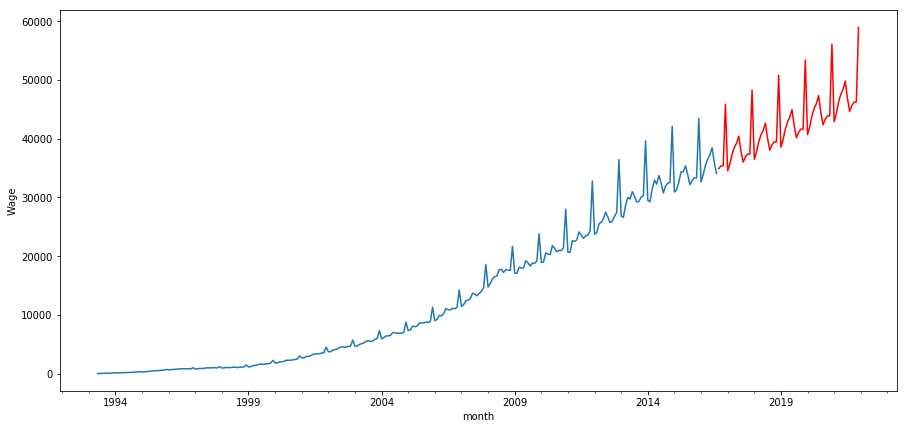

In [33]:
WAG2 = WAG[['WAG_C_M']]
WAG2
forcast=invboxcox(best_model.predict(start=280, end=343), lmbda)
plt.figure(figsize(15,7))
WAG2.WAG_C_M.plot()
forcast.plot(color='r')
plt.ylabel('Wage')
pylab.show()

In [34]:
date_list = [datetime.datetime.strptime("2016-08-01", "%Y-%m-%d") + relativedelta(months=x) for x in range(0,65)]
#date_list

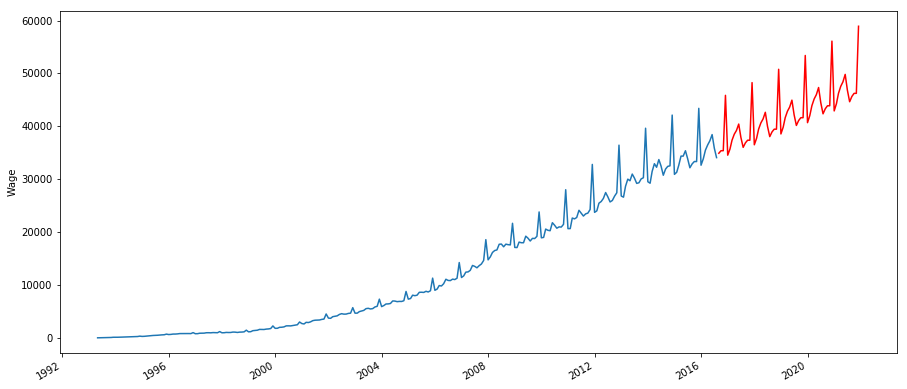

In [35]:
# CODE 5
# Make the forecast until 2021 year. Fill the None's: 

WAG2 = WAG[['WAG_C_M']]
#
date_list = [datetime.datetime.strptime("2016-08-01", "%Y-%m-%d") + relativedelta(months=x) for x in range(0,65)]
#
future = pd.DataFrame(index=date_list, columns= WAG2.columns)
WAG2 = pd.concat([WAG2, future])
#
WAG2['forecast'] = invboxcox(best_model.predict(start=280, end=343), lmbda)
#

plt.figure(figsize(15,7))
WAG2.WAG_C_M.plot()
WAG2.forecast.plot(color='r')
plt.ylabel('Wage')
pylab.show()